<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
#| eval: false
!pip list | grep fastAIcourse
!pip list | grep datasets

fastAIcourse                  0.0.91      /home/ben/BENEDICT_Only/Benedict_Projects/Benedict_ML/fastAIcourse
datasets                      2.14.4
datasetsforecast              0.0.8


In [ ]:
#| eval: false
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
torch.manual_seed(1)
mpl.rcParams['image.cmap'] = 'gray'

In [ ]:
#| eval: false
logging.disable(logging.WARNING)

In [ ]:
#| eval: false
name = "fashion_mnist"
ds_builder = load_dataset_builder(name)
print(ds_builder.info.description)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of
60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in
replacement for the original MNIST dataset for benchmarking machine learning algorithms.
It shares the same image size and structure of training and testing splits.



In [ ]:
#| eval: false
ds_builder.info.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [ ]:
#| eval: false
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31296607, num_examples=60000, shard_lengths=None, dataset_name='fashion_mnist'),
 'test': SplitInfo(name='test', num_bytes=5233810, num_examples=10000, shard_lengths=None, dataset_name='fashion_mnist')}

In [ ]:
#| eval: false
dsd = load_dataset(name)
dsd

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [ ]:
#| eval: false
train,test = dsd['train'],dsd['test']
train[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 9}

In [ ]:
#| eval: false
x,y = ds_builder.info.features

In [ ]:
#| eval: false
x,y

('image', 'label')

In [ ]:
#| eval: false
x,y = 'image','label'
img = train[0][x]
img

In [ ]:
#| eval: false
xb = train[:5][x]
yb = train[:5][y]
xb, yb

([<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>],
 [9, 0, 0, 3, 0])

In [ ]:
#| eval: false
featy = train.features[y]
featy

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [ ]:
#| eval: false
featy.int2str(yb)

['Ankle boot',
 'T - shirt / top',
 'T - shirt / top',
 'Dress',
 'T - shirt / top']

In [ ]:
#| eval: false
train['label'][:5]

[9, 0, 0, 3, 0]

In [1]:
#| echo: false
#| output: asis
show_doc(collate_fn)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L31){target="_blank" style="float:right; font-size:smaller"}

### collate_fn

>      collate_fn (b)

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
def collate_fn(b):
    return {x:torch.stack([TF.to_tensor(o[x]) for o in b]),
            y:tensor([o[y] for o in b])}

In [ ]:
#| eval: false
dl = DataLoader(train, collate_fn=collate_fn, batch_size=16)
b = next(iter(dl))
b[x].shape,b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9]))

In [2]:
#| echo: false
#| output: asis
show_doc(transforms)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L36){target="_blank" style="float:right; font-size:smaller"}

### transforms

>      transforms (b)

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
def transforms(b):
    b[x] = [TF.to_tensor(o) for o in b[x]]
    return b

In [ ]:
#| eval: false
tds = train.with_transform(transforms)
dl = DataLoader(tds, batch_size=16)
b = next(iter(dl))
b[x].shape,b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9]))

In [3]:
#| echo: false
#| output: asis
show_doc(inplace)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L44){target="_blank" style="float:right; font-size:smaller"}

### inplace

>      inplace (f)

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
def _transformi(b): b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
def inplace(f):
    def _f(b):
        f(b)
        return b
    return _f

In [ ]:
#| eval: false
transformi = inplace(_transformi)

In [ ]:
#| eval: false
r = train.with_transform(transformi)[0]
r[x].shape,r[y]

(torch.Size([784]), 9)

In [4]:
#| echo: false
#| output: asis
show_doc(transformi)

---

### inplace.<locals>._f

>      inplace.<locals>._f (b)

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
@inplace
def transformi(b): b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

In [ ]:
#| eval: false
tdsf = train.with_transform(transformi)
r = tdsf[0]
r[x].shape,r[y]

(torch.Size([784]), 9)

In [ ]:
#| eval: false
d = dict(a=1,b=2,c=3)
ig = it emgetter('a','c')
ig(d)

(1, 3)

In [5]:
#| echo: false
#| output: asis
show_doc(D)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L55){target="_blank" style="float:right; font-size:smaller"}

### D

>      D ()

*Initialize self.  See help(type(self)) for accurate signature.*

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
class D:
    def __getitem__(self, k): return 1 if k=='a' else 2 if k=='b' else 3

In [ ]:
#| eval: false
d = D()
ig(d)

(1, 3)

In [ ]:
#| eval: false
list(tdsf.features)

['image', 'label']

In [ ]:
#| eval: false
batch = dict(a=[1],b=[2]), dict(a=[3],b=[4])
default_collate(batch)

{'a': [tensor([1, 3])], 'b': [tensor([2, 4])]}

In [6]:
#| echo: false
#| output: asis
show_doc(collate_dict)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L59){target="_blank" style="float:right; font-size:smaller"}

### collate_dict

>      collate_dict (ds)

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
def collate_dict(ds):
    get = itemgetter(*ds.features)
    def _f(b): return get(default_collate(b))
    return _f

In [ ]:
#| eval: false
dlf = DataLoader(tdsf, batch_size=4, collate_fn=collate_dict(tdsf))
xb,yb = next(iter(dlf))
xb.shape,yb

(torch.Size([4, 784]), tensor([9, 0, 0, 3]))

## Plotting images

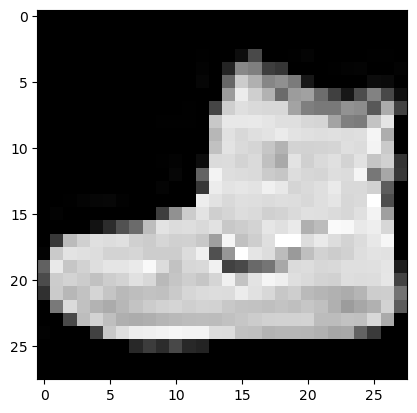

In [ ]:
#| eval: false
b = next(iter(dl))
xb = b['image']
img = xb[0]
plt.imshow(img[0]);

In [7]:
#| echo: false
#| output: asis
show_doc(show_image)

/home/ben/miniconda3/envs/pfast/lib/python3.12/site-packages/fastcore/docscrape.py:230: UserWarning: Unknown section Other Parameters
  else: warn(msg)
/home/ben/miniconda3/envs/pfast/lib/python3.12/site-packages/fastcore/docscrape.py:230: UserWarning: Unknown section See Also
  else: warn(msg)


---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L66){target="_blank" style="float:right; font-size:smaller"}

### show_image

>      show_image (im, ax=None, figsize=None, title=None, noframe=True,
>                  cmap=None, norm=None, aspect=None, interpolation=None,
>                  alpha=None, vmin=None, vmax=None, origin=None, extent=None,
>                  interpolation_stage=None, filternorm=True, filterrad=4.0,
>                  resample=None, url=None, data=None)

*Show a PIL or PyTorch image on `ax`.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  |  |
| ax | NoneType | None |  |
| figsize | NoneType | None |  |
| title | NoneType | None |  |
| noframe | bool | True |  |
| cmap | NoneType | None | The Colormap instance or registered colormap name used to map scalar data<br>to colors.<br><br>This parameter is ignored if *X* is RGB(A). |
| norm | NoneType | None | The normalization method used to scale scalar data to the [0, 1] range<br>before mapping to colors using *cmap*. By default, a linear scaling is<br>used, mapping the lowest value to 0 and the highest to 1.<br><br>If given, this can be one of the following:<br><br>- An instance of `.Normalize` or one of its subclasses<br>  (see :ref:`colormapnorms`).<br>- A scale name, i.e. one of "linear", "log", "symlog", "logit", etc.  For a<br>  list of available scales, call `matplotlib.scale.get_scale_names()`.<br>  In that case, a suitable `.Normalize` subclass is dynamically generated<br>  and instantiated.<br><br>This parameter is ignored if *X* is RGB(A). |
| aspect | NoneType | None | The aspect ratio of the Axes.  This parameter is particularly<br>relevant for images since it determines whether data pixels are<br>square.<br><br>This parameter is a shortcut for explicitly calling<br>`.Axes.set_aspect`. See there for further details.<br><br>- 'equal': Ensures an aspect ratio of 1. Pixels will be square<br>  (unless pixel sizes are explicitly made non-square in data<br>  coordinates using *extent*).<br>- 'auto': The Axes is kept fixed and the aspect is adjusted so<br>  that the data fit in the Axes. In general, this will result in<br>  non-square pixels.<br><br>Normally, None (the default) means to use :rc:`image.aspect`.  However, if<br>the image uses a transform that does not contain the axes data transform,<br>then None means to not modify the axes aspect at all (in that case, directly<br>call `.Axes.set_aspect` if desired). |
| interpolation | NoneType | None | The interpolation method used.<br><br>Supported values are 'none', 'antialiased', 'nearest', 'bilinear',<br>'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite',<br>'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell',<br>'sinc', 'lanczos', 'blackman'.<br><br>The data *X* is resampled to the pixel size of the image on the<br>figure canvas, using the interpolation method to either up- or<br>downsample the data.<br><br>If *interpolation* is 'none', then for the ps, pdf, and svg<br>backends no down- or upsampling occurs, and the image data is<br>passed to the backend as a native image.  Note that different ps,<br>pdf, and svg viewers may display these raw pixels differently. On<br>other backends, 'none' is the same as 'nearest'.<br><br>If *interpolation* is the default 'antialiased', then 'nearest'<br>interpolation is used if the image is upsampled by more than a<br>factor of three (i.e. the number of display pixels is at least<br>three times the size of the data array).  If the upsampling rate is<br>smaller than 3, or the image is downsampled, then 'hanning'<br>interpolation is used to act as an anti-aliasing filter, unless the<br>image happens to be upsampled by exactly a factor of two or one.<br><br>See<br>:doc:`/gallery/images_contours_and_fields/interpolation_methods`<br>for an overview of the supported interpolation methods, and<br>:doc:`/gallery/images_contours_and_fields/image_antialiasing` for<br>a discussion of image antialiasing.<br><br>Some interpolation methods require an additional radius parameter,<br>which can be set by *filterrad*. Additionally, the antigrain image<br>resize filter is controlled by the parameter *filternorm*. |
| alpha | NoneType | None | The alpha blending value, between 0 (transparent) and 1 (opaque).<br>If *alpha* is an array, the alpha blending values are applied pixel<br>by pixel, and *alpha* must have the same shape as *X*. |
| vmin | NoneType | None |  |
| vmax | NoneType | None |  |
| origin | NoneType | None | Place the [0, 0] index of the array in the upper left or lower<br>left corner of the Axes. The convention (the default) 'upper' is<br>typically used for matrices and images.<br><br>Note that the vertical axis points upward for 'lower'<br>but downward for 'upper'.<br><br>See the :ref:`imshow_extent` tutorial for<br>examples and a more detailed description. |
| extent | NoneType | None | The bounding box in data coordinates that the image will fill.<br>These values may be unitful and match the units of the Axes.<br>The image is stretched individually along x and y to fill the box.<br><br>The default extent is determined by the following conditions.<br>Pixels have unit size in data coordinates. Their centers are on<br>integer coordinates, and their center coordinates range from 0 to<br>columns-1 horizontally and from 0 to rows-1 vertically.<br><br>Note that the direction of the vertical axis and thus the default<br>values for top and bottom depend on *origin*:<br><br>- For ``origin == 'upper'`` the default is<br>  ``(-0.5, numcols-0.5, numrows-0.5, -0.5)``.<br>- For ``origin == 'lower'`` the default is<br>  ``(-0.5, numcols-0.5, -0.5, numrows-0.5)``.<br><br>See the :ref:`imshow_extent` tutorial for<br>examples and a more detailed description. |
| interpolation_stage | NoneType | None | If 'data', interpolation<br>is carried out on the data provided by the user.  If 'rgba', the<br>interpolation is carried out after the colormapping has been<br>applied (visual interpolation). |
| filternorm | bool | True | A parameter for the antigrain image resize filter (see the<br>antigrain documentation).  If *filternorm* is set, the filter<br>normalizes integer values and corrects the rounding errors. It<br>doesn't do anything with the source floating point values, it<br>corrects only integers according to the rule of 1.0 which means<br>that any sum of pixel weights must be equal to 1.0.  So, the<br>filter function must produce a graph of the proper shape. |
| filterrad | float | 4.0 | The filter radius for filters that have a radius parameter, i.e.<br>when interpolation is one of: 'sinc', 'lanczos' or 'blackman'. |
| resample | NoneType | None | When *True*, use a full resampling method.  When *False*, only<br>resample when the output image is larger than the input image. |
| url | NoneType | None | Set the url of the created `.AxesImage`. See `.Artist.set_url`. |
| data | NoneType | None |  |

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
@fc.delegates(plt.Axes.imshow)
def show_image(im, ax=None, figsize=None, title=None, noframe=True, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    if fc.hasattrs(im, ('cpu','permute','detach')):
        im = im.detach().cpu()
        if len(im.shape)==3 and im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=np.array(im)
    if im.shape[-1]==1: im=im[...,0]
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    if noframe: ax.axis('off')
    return ax

In [ ]:
#| eval: false
help(show_image)

Help on function show_image in module __main__:

show_image(im, ax=None, figsize=None, title=None, noframe=True, *, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None)
    Show a PIL or PyTorch image on `ax`.



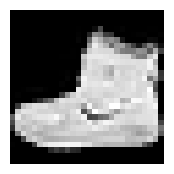

In [ ]:
#| eval: false
show_image(img, figsize=(2,2));

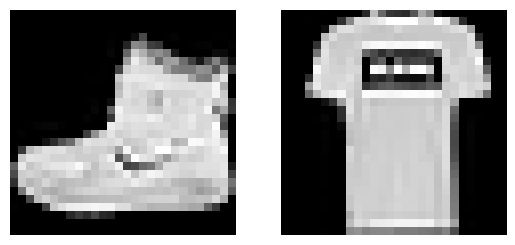

In [ ]:
#| eval: false
fig,axs = plt.subplots(1,2)
show_image(img, axs[0])
show_image(xb[1], axs[1]);

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
@fc.delegates(plt.subplots, keep=True)
def subplots(
    nrows:int=1, # Number of rows in returned axes grid
    ncols:int=1, # Number of columns in returned axes grid
    figsize:tuple=None, # Width, height in inches of the returned figure
    imsize:int=3, # Size (in inches) of images that will be displayed in the returned figure
    suptitle:str=None, # Title to be set to returned figure
    **kwargs
): # fig and axs
    "A figure and set of subplots to display images of `imsize` inches"
    if figsize is None: figsize=(ncols*imsize, nrows*imsize)
    fig,ax = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)
    if suptitle is not None: fig.suptitle(suptitle)
    if nrows*ncols==1: ax = np.array([ax])
    return fig,ax

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
from nbdev.showdoc import show_doc

In [ ]:
#| echo: false
#| output: asis
#| eval: false
show_doc(subplots)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L83){target="_blank" style="float:right; font-size:smaller"}

### subplots

>      subplots (nrows:int=1, ncols:int=1, figsize:tuple=None, imsize:int=3,
>                suptitle:str=None, sharex=False, sharey=False, squeeze=True,
>                width_ratios=None, height_ratios=None, subplot_kw=None,
>                gridspec_kw=None, **kwargs)

A figure and set of subplots to display images of `imsize` inches

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| nrows | int | 1 | Number of rows in returned axes grid |
| ncols | int | 1 | Number of columns in returned axes grid |
| figsize | tuple | None | Width, height in inches of the returned figure |
| imsize | int | 3 | Size (in inches) of images that will be displayed in the returned figure |
| suptitle | str | None | Title to be set to returned figure |
| sharex | bool | False |  |
| sharey | bool | False |  |
| squeeze | bool | True |  |
| width_ratios | NoneType | None |  |
| height_ratios | NoneType | None |  |
| subplot_kw | NoneType | None |  |
| gridspec_kw | NoneType | None |  |
| kwargs |  |  |  |

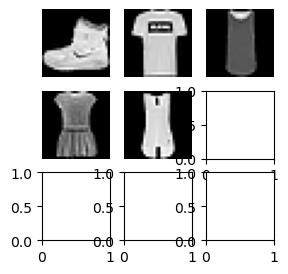

In [ ]:
#| eval: false
fig,axs = subplots(3,3, imsize=1)
imgs = xb[:8]
for ax,img in zip(axs.flat,imgs): show_image(img, ax)

--checking

In [8]:
#| echo: false
#| output: asis
show_doc(get_grid)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L102){target="_blank" style="float:right; font-size:smaller"}

### get_grid

>      get_grid (n:int, nrows:int=None, ncols:int=None, title:str=None,
>                weight:str='bold', size:int=14, **kwargs)

*Return a grid of `n` axes, `rows` by `cols`*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n | int |  | Number of axes |
| nrows | int | None | Number of rows, defaulting to `int(math.sqrt(n))` |
| ncols | int | None | Number of columns, defaulting to `ceil(n/rows)` |
| title | str | None | If passed, title set to the figure |
| weight | str | bold | Title font weight |
| size | int | 14 | Title font size |
| kwargs |  |  |  |

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
def get_grid(
    n:int, # Number of axes
    nrows:int=None, # Number of rows, defaulting to `int(math.sqrt(n))`
    ncols:int=None, # Number of columns, defaulting to `ceil(n/rows)`
    title:str=None, # If passed, title set to the figure
    weight:str='bold', # Title font weight
    size:int=14, # Title font size
    **kwargs,
): # fig and axs
    "Return a grid of `n` axes, `rows` by `cols`"
    if nrows: ncols = ncols or int(np.floor(n/nrows))
    elif ncols: nrows = nrows or int(np.ceil(n/ncols))
    else:
        nrows = int(math.sqrt(n))
        ncols = int(np.floor(n/nrows))
    fig,axs = subplots(nrows, ncols, **kwargs)
    for i in range(n, nrows*ncols): axs.flat[i].set_axis_off()
    if title is not None: fig.suptitle(title, weight=weight, size=size)
    return fig,axs

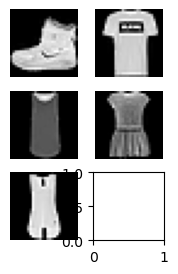

In [ ]:
#| eval: false
fig,axs = get_grid(8, nrows=3, imsize=1)
for ax,img in zip(axs.flat,imgs): show_image(img, ax)

In [9]:
#| echo: false
#| output: asis
show_doc(show_images)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L123){target="_blank" style="float:right; font-size:smaller"}

### show_images

>      show_images (ims:list, nrows:int|None=None, ncols:int|None=None,
>                   titles:list|None=None, **kwargs)

*Show all images `ims` as subplots with `rows` using `titles`*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| ims | list |  | Images to show |
| nrows | int \| None | None | Number of rows in grid |
| ncols | int \| None | None | Number of columns in grid (auto-calculated if None) |
| titles | list \| None | None | Optional list of titles for each image |
| kwargs |  |  |  |

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
def show_images(ims:list, # Images to show
                nrows:int|None=None, # Number of rows in grid
                ncols:int|None=None, # Number of columns in grid (auto-calculated if None)
                titles:list|None=None, # Optional list of titles for each image
                **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`"
    axs = get_grid(len(ims), nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip_longest(ims, titles or [], axs): show_image(im, ax=ax, title=t)

In [ ]:
#| eval: false
yb = b['label']
lbls = yb[:8]

In [ ]:
#| eval: false
names = "Top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Boot".split()
titles = itemgetter(*lbls)(names)
' '.join(titles)

'Boot Top Top Dress Top Pullover Sneaker Pullover'

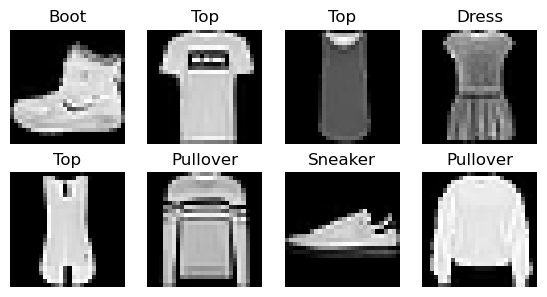

In [ ]:
#| eval: false
show_images(imgs, imsize=1.7, titles=titles)

In [10]:
#| echo: false
#| output: asis
show_doc(DataLoaders)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/datasets.py#L133){target="_blank" style="float:right; font-size:smaller"}

### DataLoaders

>      DataLoaders (*dls)

*Initialize self.  See help(type(self)) for accurate signature.*

In [ ]:
#| code-fold: show
#| code-summary: "Exported source"
class DataLoaders:
    def __init__(self, *dls): self.train,self.valid = dls[:2]

    @classmethod
    def from_dd(cls, dd, batch_size, as_tuple=True, **kwargs):
        f = collate_dict(dd['train'])
        return cls(*get_dls(*dd.values(), bs=batch_size, collate_fn=f, **kwargs))